In [249]:
import numpy as np
import pandas as pd

In [250]:
data = pd.read_csv('Data - A1.csv')
data.head()

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955


# Preprocessing

In [251]:
mean_x = data['X'].mean()
std_x = data['X'].std()

print(f'Mean: {mean_x} | Stddev: {std_x}')

Mean: -4.440892098500626e-18 | Stddev: 0.5782170892807795


### Normalising

In [252]:
data['X'] = (data['X'] - mean_x) / (std_x)
data.head()

,X,Y
0,1.708680,5.098368
1,1.244722,2.516654
2,-0.697668,0.337961
3,0.185237,0.737320
4,0.597259,-0.780955


In [253]:
data = data.sample(frac=1, random_state=42)

split_frac = int(0.8 * len(data))

train_data = data[:split_frac]
test_data = data[split_frac:]

In [254]:
print(f'TotalLen: {len(data)} | TrainLen: {len(train_data)} | TestLen: {len(test_data)}')

TotalLen: 1000 | TrainLen: 800 | TestLen: 200


# Polynomial Regression

In [255]:
def create_pol(X, degree):
    return np.column_stack([X ** i for i in range(1, degree + 1)])

X = np.array([1, 2, 3])

In [256]:
degrees = [_ for _ in range(1, 10)]
print(degrees)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [257]:
X_train = train_data['X'].values
X_test = test_data['X'].values

y_train = train_data['Y'].values
y_test = test_data['Y'].values

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800,) (200,) (800,) (200,)


## Training

In [258]:
lr, num_itrs = 0.01, 500

mses = []
ws, bs = [], []
ws_e, bs_e = [], []


for degree in degrees:
    X_pol = create_pol(X_train, degree)    
    print(f'Shape of X_pol: {X_pol.shape}')

    w = np.random.random(X_pol.shape[1])
    print(f'Shape of w: {w.shape}')
    
    b = 0
    w_e = []
    b_e = []
    for _ in range(num_itrs):
        y_pred = X_pol.dot(w) + b
        m = X_pol.shape[0]
        gradient_w = (1/m) * X_pol.T.dot(y_pred - y_train)
        gradient_b = (1/m) * np.sum(y_pred - y_train)
        w -= lr * gradient_w
        b -= lr * gradient_b
        w_e.append(w)
        b_e.append(b)

    ws.append(w)
    bs.append(b)
    ws_e.append(w_e)
    bs_e.append(b_e)

    mse = np.mean((X_pol.dot(w) + b - y_train)**2)
    mses.append(mse)

Shape of X_pol: (800, 1)
Shape of w: (1,)
Shape of X_pol: (800, 2)
Shape of w: (2,)
Shape of X_pol: (800, 3)
Shape of w: (3,)
Shape of X_pol: (800, 4)
Shape of w: (4,)
Shape of X_pol: (800, 5)
Shape of w: (5,)
Shape of X_pol: (800, 6)
Shape of w: (6,)
Shape of X_pol: (800, 7)
Shape of w: (7,)
Shape of X_pol: (800, 8)
Shape of w: (8,)
Shape of X_pol: (800, 9)
Shape of w: (9,)


C:\Users\krovi\AppData\Local\Temp\ipykernel_27584\3787413408.py:33: RuntimeWarning: overflow encountered in square
  mse = np.mean((X_pol.dot(w) + b - y_train)**2)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\krovi\AppData\Local\Temp\ipykernel_27584\3787413408.py:23: RuntimeWarning: invalid value encountered in subtract
  w -= lr * gradient_w


In [259]:
test_mses = []

for degree in degrees:
    X_pol = create_pol(X=X_test, degree=degree)
    
    prediction = X_pol.dot(ws[degree - 1]) + bs[degree - 1]
    
    testing_mse = np.mean((prediction - y_test) ** 2)
    
    test_mses.append(testing_mse)

C:\Users\krovi\AppData\Local\Temp\ipykernel_27584\144954667.py:8: RuntimeWarning: overflow encountered in square
  testing_mse = np.mean((prediction - y_test) ** 2)


### Train MSEs

In [260]:
print(f"Min train mse is {min(mses)} for degree {mses.index(min(mses))+1}")
print(f'Train MSEs: {mses}')

Min train mse is 0.9574199890530469 for degree 5
Train MSEs: [1.3594866291457544, 1.3550659266025473, 0.9633347887388263, 0.9741815053828372, 0.9574199890530469, 0.9724914130205359, 1.0048857865034468, inf, nan]


### Test MSEs

In [261]:
print(f"Min test mse is {min(test_mses)} for degree {test_mses.index(min(test_mses))+1}")
best_degree = test_mses.index(min(test_mses))+1
print(f'Test MSEs: {test_mses}')

Min test mse is 1.0130149025410136 for degree 5
Test MSEs: [1.3278906963841883, 1.347146771733772, 1.015023342839246, 1.0135313702418747, 1.0130149025410136, 1.0242874360130756, 1.077111306395241, inf, nan]


## Plot of Train-Test MSEs

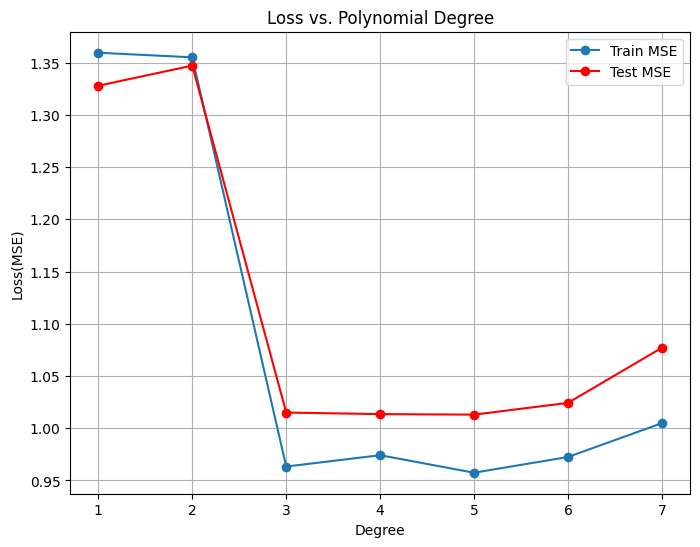

In [262]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(degrees, mses, marker='o', label='Train MSE')
plt.plot(degrees, test_mses, marker='o', color='r', label='Test MSE')
plt.title("Loss vs. Polynomial Degree")
plt.xlabel("Degree")
plt.ylabel("Loss(MSE)")
plt.legend()
plt.grid(True)

plt.show()

## Plot of Train-Test MSEs vs Epochs

C:\Users\krovi\AppData\Local\Temp\ipykernel_27584\2191260582.py:14: RuntimeWarning: overflow encountered in square
  train_mse.append(np.mean((prediction_train - y_train) ** 2))
C:\Users\krovi\AppData\Local\Temp\ipykernel_27584\2191260582.py:15: RuntimeWarning: overflow encountered in square
  testing_mse.append(np.mean((prediction_test - y_test) ** 2))


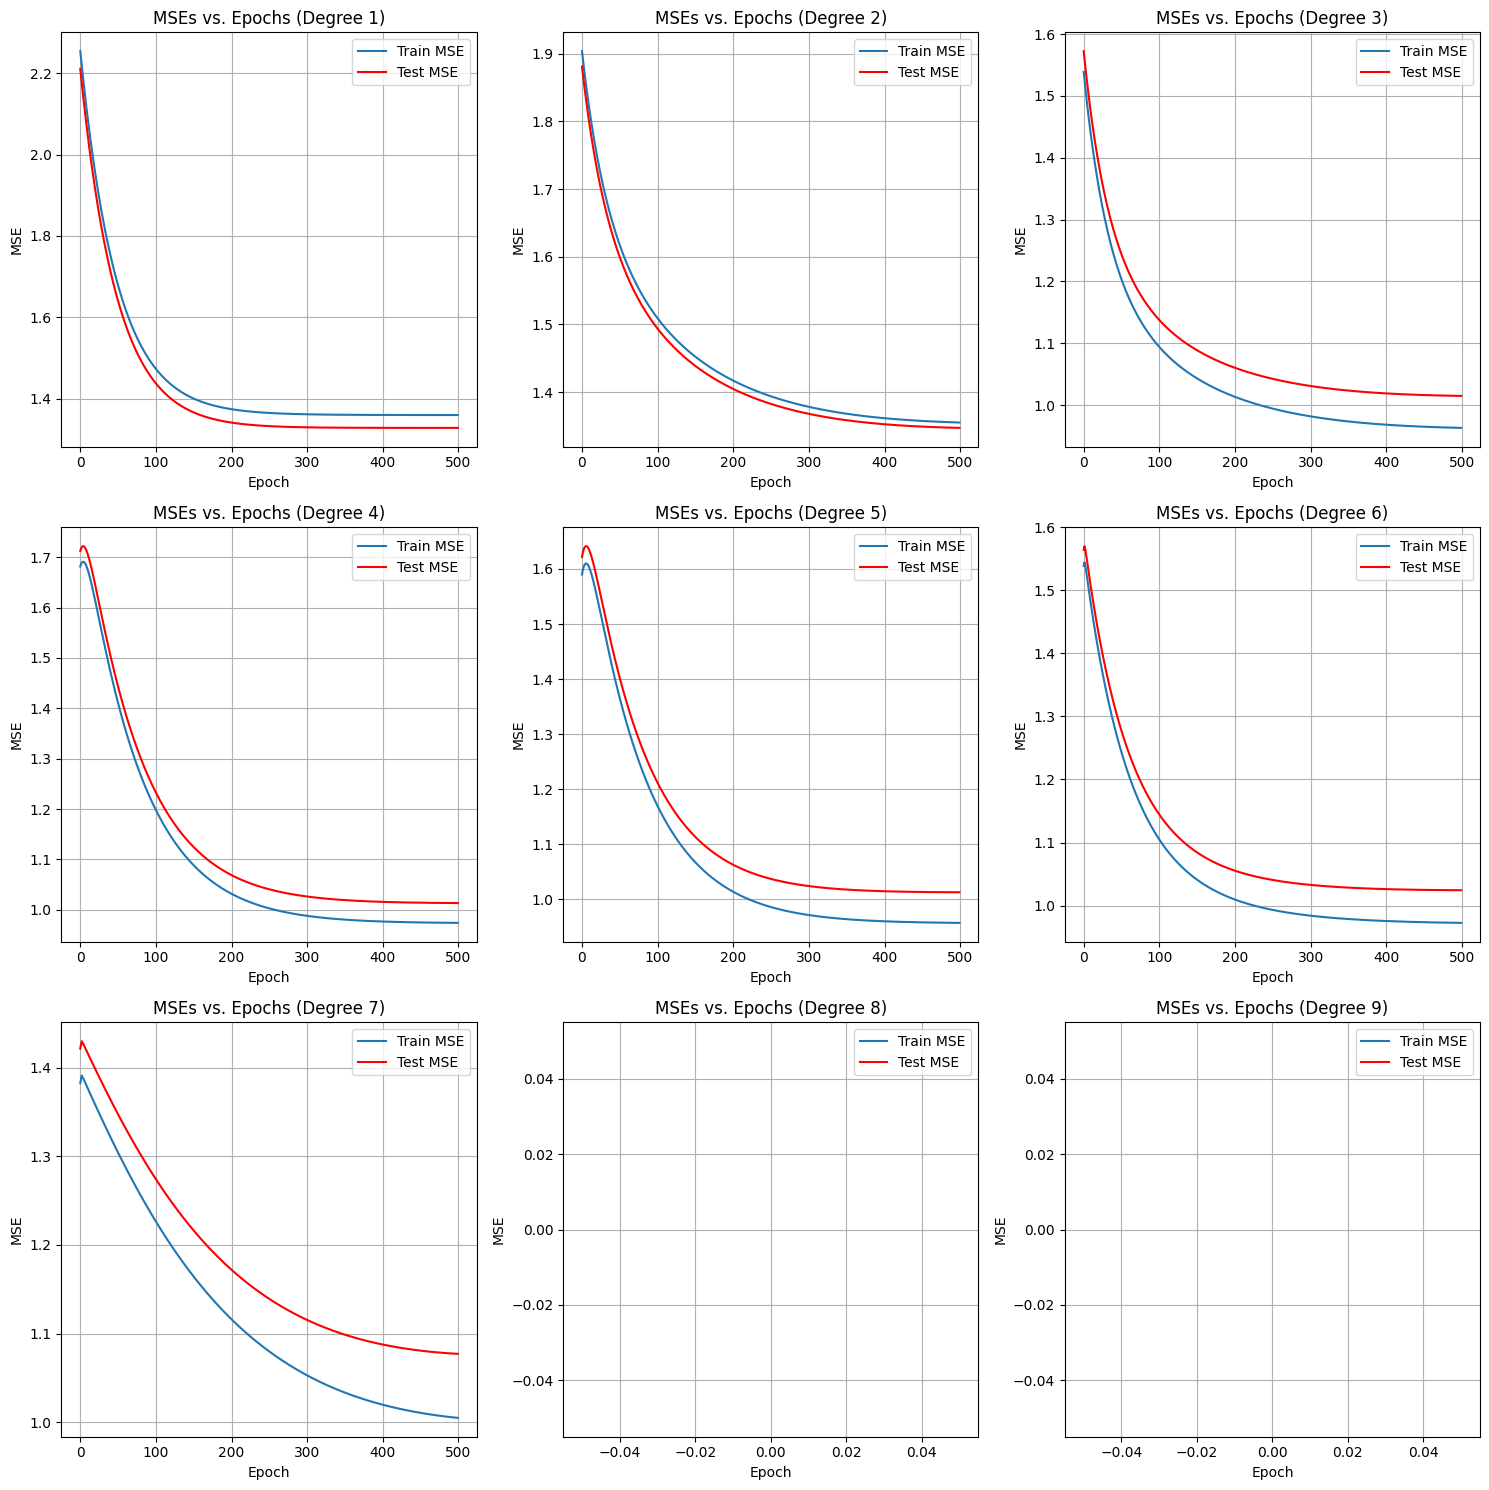

In [263]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for degree, ax in zip(range(1, 10), axes.flatten()):
    X_pol = create_pol(X=X_train, degree=degree)
    train_mse = []
    testing_mse = []

    for epoch in range(500):
        prediction_train = X_pol.dot(ws_e[degree-1][epoch]) + bs_e[degree - 1][epoch]
        prediction_test = create_pol(X=X_test, degree=degree).dot(ws_e[degree-1][epoch]) + bs_e[degree - 1][epoch]

        train_mse.append(np.mean((prediction_train - y_train) ** 2))
        testing_mse.append(np.mean((prediction_test - y_test) ** 2))

    ax.plot(range(500), train_mse, label='Train MSE')
    ax.plot(range(500), testing_mse, color='r', label='Test MSE')
    ax.set_title(f"MSEs vs. Epochs (Degree {degree})")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("MSE")
    ax.legend()
    ax.grid(True)
plt.tight_layout()
plt.show()

## Plotting Best Polynomials for each degree

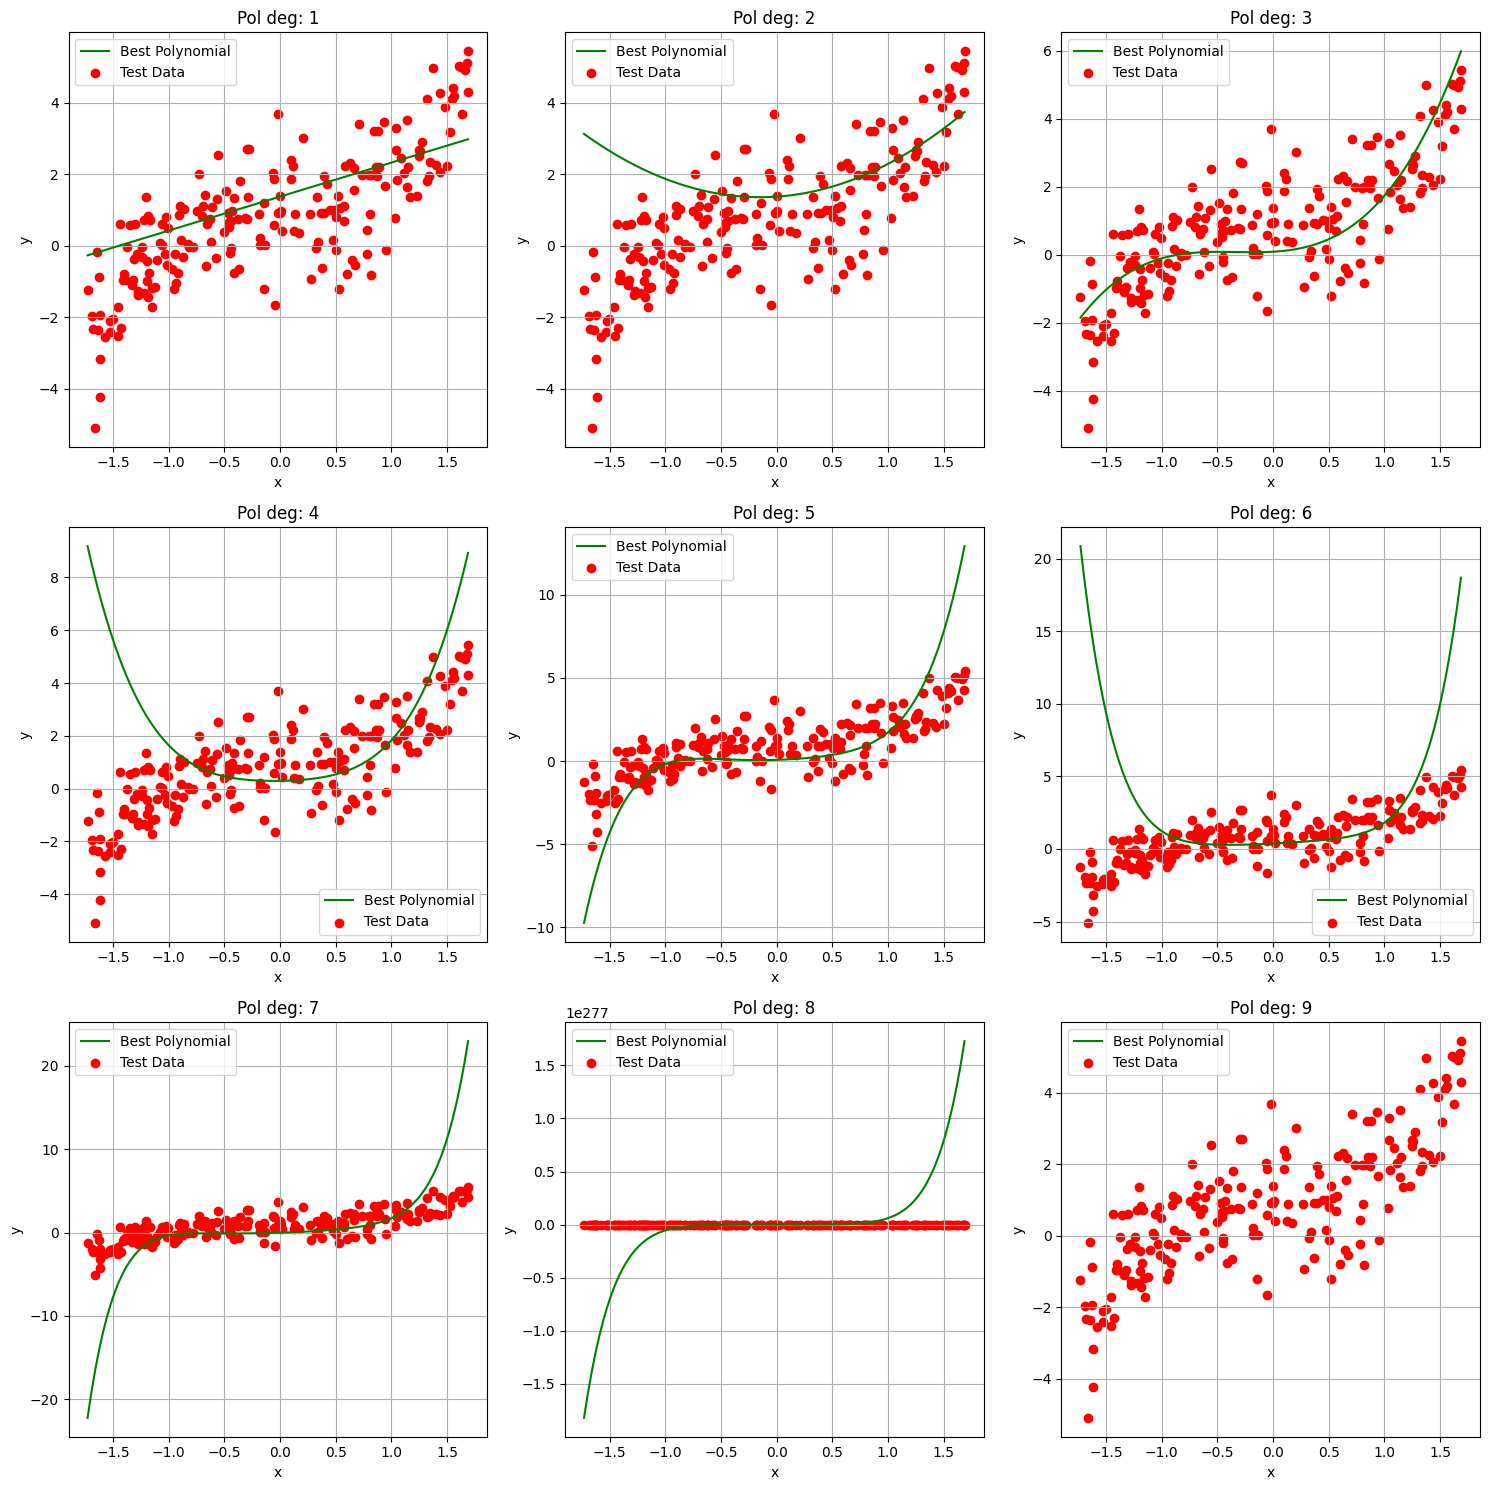

In [264]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
X_vals = np.linspace(min(X_test), max(X_test), 100)
for t, ax in zip(range(9), axes.flatten()):
    weights = ws[t]
    weights = np.append(weights, bs[t])
    weights = weights[::-1]
    y_vals = np.polyval(weights, X_vals)
    
    ax.plot(X_vals, y_vals, label='Best Polynomial', color='g')
    ax.scatter(X_test, y_test, label='Test Data', color='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Pol deg: {t+1}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

## Best polynomial :)

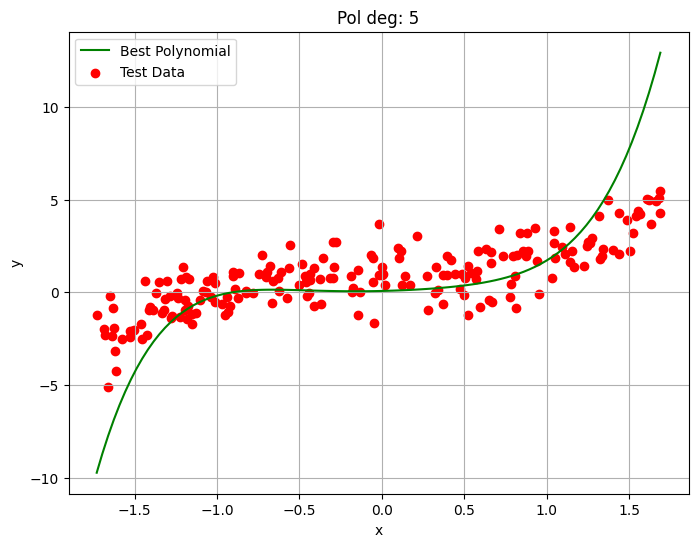

In [265]:
X_vals = np.linspace(min(X_test), max(X_test), 100)
t = best_degree -1
weights = ws[t]
weights = np.append(weights,bs[t])
weights = weights[::-1]
y_vals = np.polyval( weights, X_vals)
plt.figure(figsize=(8, 6))
plt.plot(X_vals, y_vals, label='Best Polynomial', color='g')
plt.scatter(X_test, y_test, label='Test Data', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Pol deg: {t+1}')
plt.legend()
plt.grid(True)
plt.show()